In [25]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [16]:
train_salary = pd.read_csv("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/17_Support Vector Machines/SalaryData_Train(1).csv")
test_salary=pd.read_csv("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/17_Support Vector Machines/SalaryData_Test(1).csv")
string_columns=["age","workclass","education","educationno","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native","Salary"]


In [18]:
train_salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
test_salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [20]:
test_salary.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


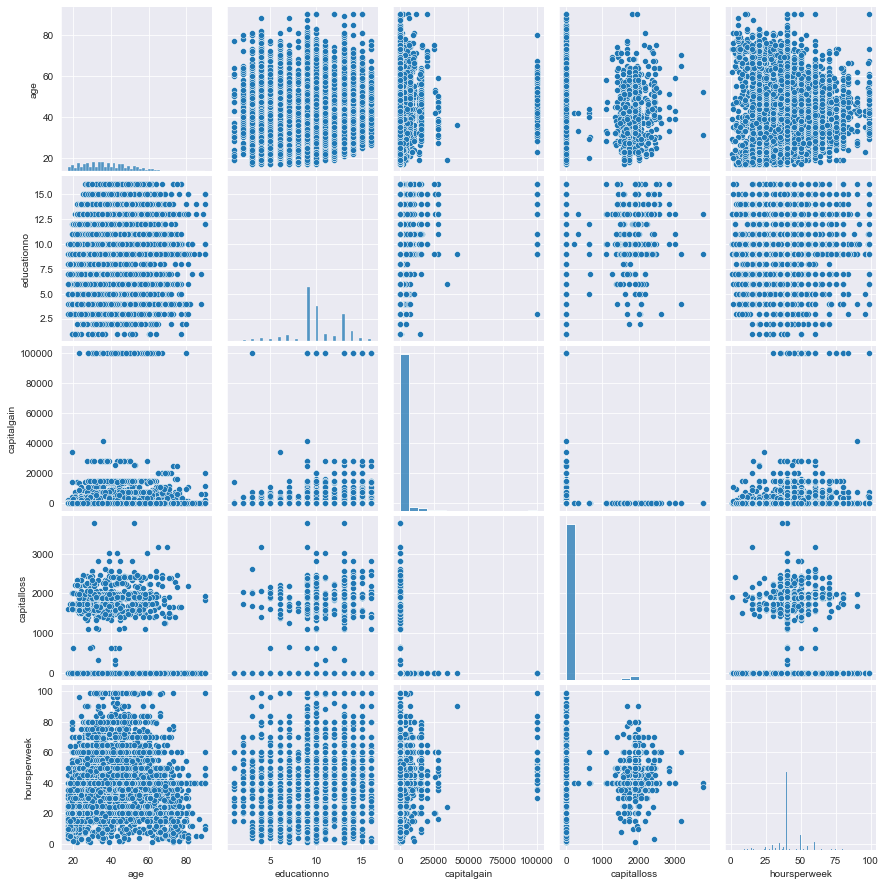

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(test_salary)

In [22]:
train_salary.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


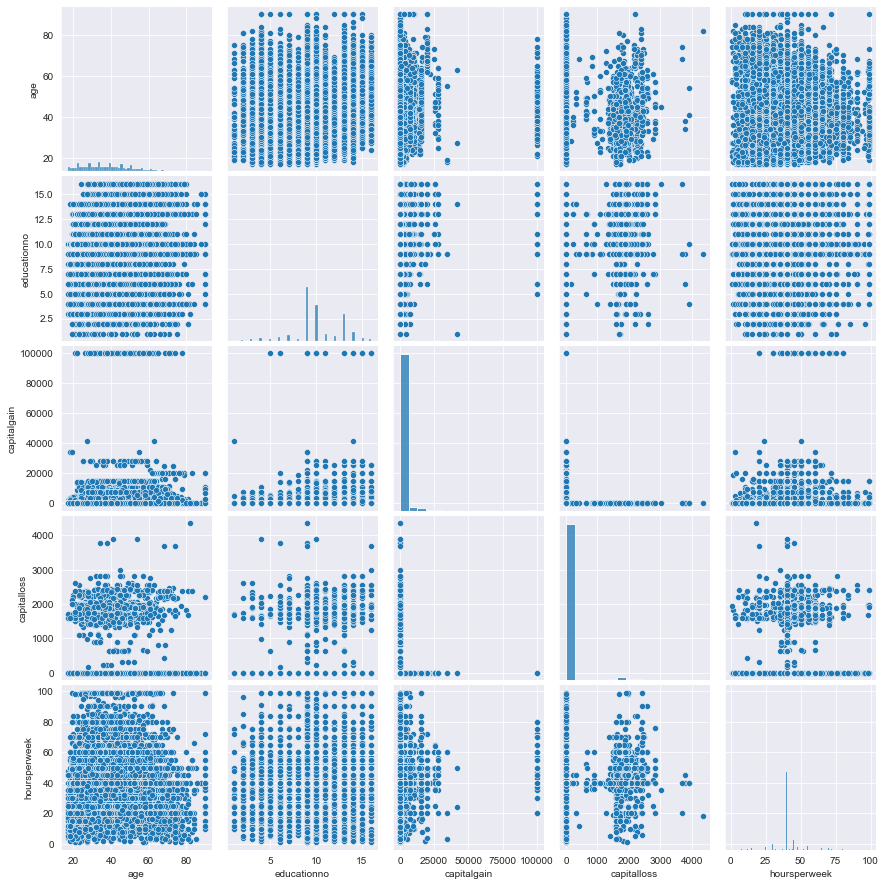

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(train_salary)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

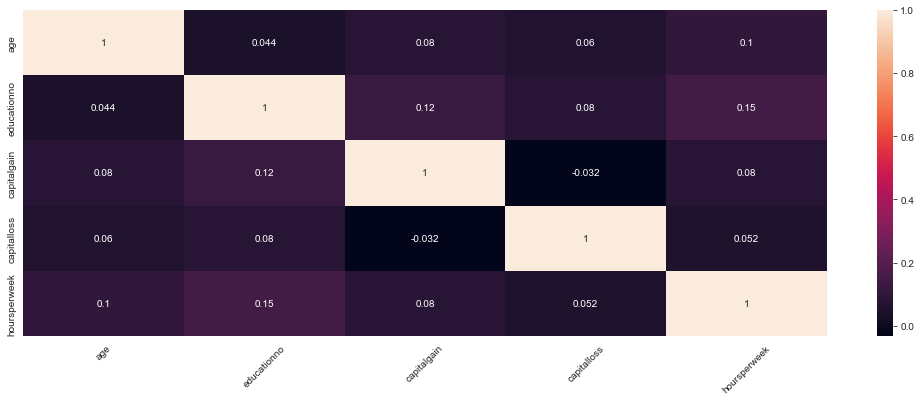

In [27]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(train_salary.corr(), annot=True);
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

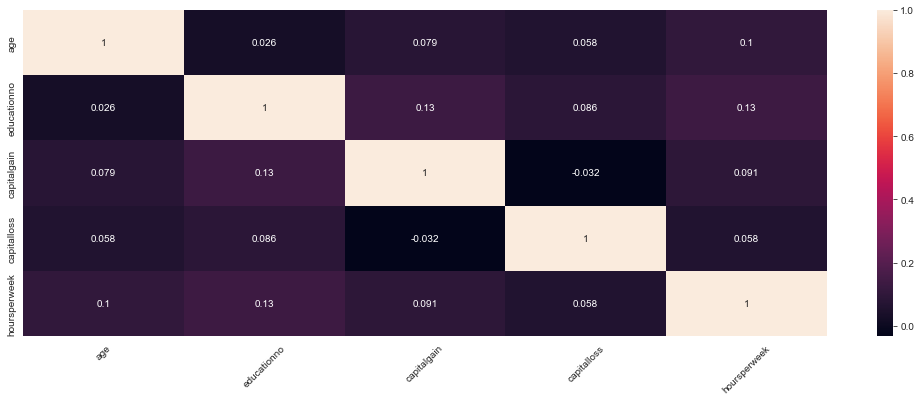

In [28]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(test_salary.corr(), annot=True);
plt.xticks(rotation=45)

In [12]:
### Let's convert categorical data into numerical using label encoding

In [13]:
le = preprocessing.LabelEncoder()
for i in string_columns:
    train_salary[i] = le.fit_transform(train_salary[i])
    test_salary[i] = le.fit_transform(test_salary[i])

colnames = train_salary.columns

In [ ]:
train_salary.head()

In [ ]:
test_salary.head()

In [ ]:
train_salary.info()

In [ ]:
test_salary.info()

In [ ]:
Xtrain = train_salary[colnames[0:13]]
Ytrain = train_salary[colnames[13]]
Xtest  = test_salary[colnames[0:13]]
Ytest  = test_salary[colnames[13]]

In [ ]:
#### Linear SVC model
linearmodel = SVC(kernel = "linear")
linearmodel.fit(Xtrain,Ytrain)
linear_pred_testdata = linearmodel.predict(Xtest)

np.mean(linear_pred_testdata==Ytest)

In [ ]:
#### rbf SVC model
rbfmodel = SVC(kernel = "rbf")
rbfmodel.fit(Xtrain,Ytrain)
rbf_pred_testdata = rbfmodel.predict(Xtest)

np.mean(rbf_pred_testdata==Ytest)

In [ ]:
#### Polynomial SVC model
polymodel = SVC(kernel = "poly")
polymodel.fit(Xtrain,Ytrain)
poly_pred_testdata = polymodel.predict(Xtest)

np.mean(poly_pred_testdata==Ytest)

#### Observation
BY comparing accuracy of all three SVC models, Polynomial SVC model has highest accuracy

### Grid Search CV

In [ ]:
clf = SVC()
param_grid = [{'kernel':['poly'] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(Xtrain,Ytrain)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

### SVD from Surprise